In [1]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 25, 10

In [3]:
def normalize(x):
    return (x-np.amin(x))/(np.amax(x)-np.amin(x))

In [4]:
def gaus2d(x=0, y=0, mx=0, my=0, sx=1, sy=1):
    return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))

In [5]:
def gaussian_low(img,var):
    rows, cols = img.shape
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)
    x = np.linspace(-10*var, 10*var, num=rows)
    y = np.linspace(-10*var, 10*var, num=cols)
    x, y = np.meshgrid(x, y)
    z = normalize(gaus2d(x, y, 0, 0, (rows*1.0)/cols, 1))
    conv_shift = dft_shift*z
    conv_shift = np.fft.ifftshift(conv_shift)
    reimg = np.absolute(np.fft.ifft2(conv_shift))

    return reimg, z

In [6]:
def gaussian_high(img, var):
    rows, cols = img.shape
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)
    x = np.linspace(-20*var, 20*var, num=rows)
    y = np.linspace(-20*var, 20*var, num=cols)
    x, y = np.meshgrid(x, y)
    z = 1.0-normalize(gaus2d(x, y, 0, 0, (rows*1.0)/cols, 1))
    print(z.shape)
    conv_shift = dft_shift*z
    conv_shift = np.fft.ifftshift(conv_shift)
    reimg = np.absolute(np.fft.ifft2(conv_shift))
    return reimg, z

In [7]:
def ideal_low(img,radius):
    rows, cols = img.shape
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)
    x = np.zeros((rows,cols))
    circle = cv2.circle(x,(rows/2,cols/2),radius,1,-1)
    conv_shift = dft_shift*circle
    conv_shift = np.fft.ifftshift(conv_shift)
    reimg = np.absolute(np.fft.ifft2(conv_shift))
    return reimg, circle

In [8]:
def ideal_high(img,radius):
    rows, cols = img.shape
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)
    x = np.ones((rows,cols))
    circle = cv2.circle(x,(rows/2,cols/2),radius,0,-1)
    conv_shift = dft_shift*circle
    conv_shift = np.fft.ifftshift(conv_shift)
    reimg = np.absolute(np.fft.ifft2(conv_shift))
    return reimg, circle

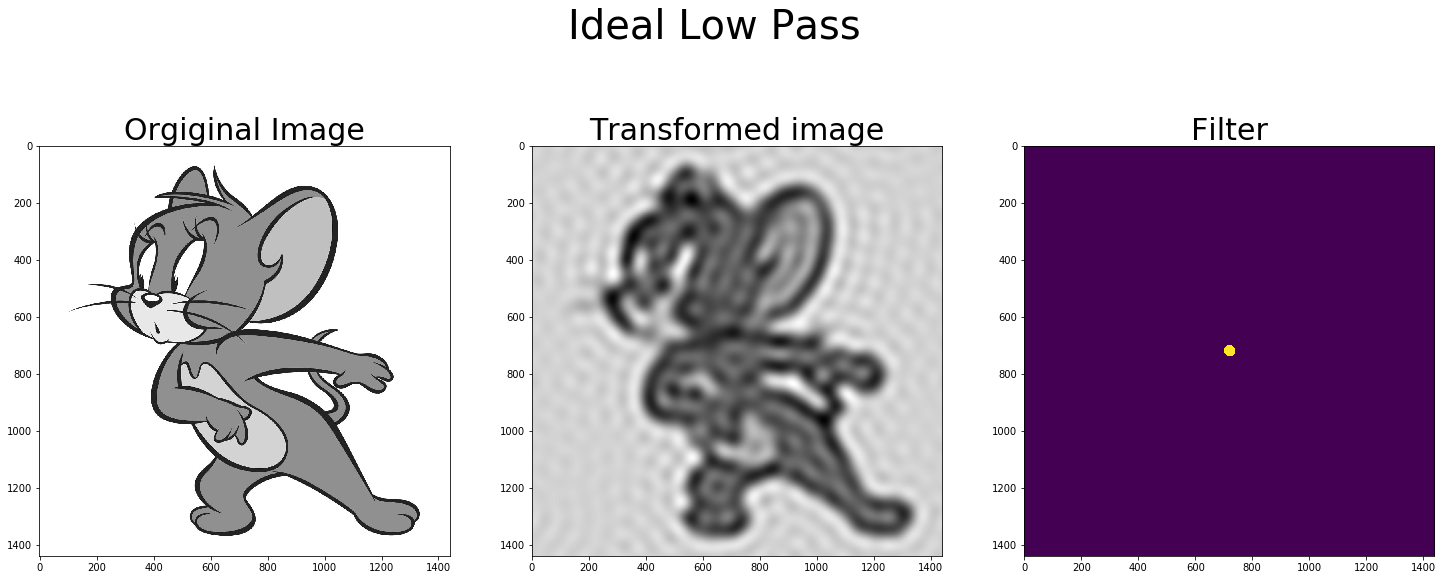

In [11]:
img = cv2.imread('5.jpg',0).astype('float64')
blur, circle = ideal_low(img,20)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.suptitle('Ideal Low Pass', fontsize=40)
ax1.set_title('Orgiginal Image', fontsize=30)
im1 = ax1.imshow(img, cmap='gray')
ax2.set_title('Transformed image', fontsize=30)
im2 = ax2.imshow(blur, cmap='gray')
ax3.set_title('Filter', fontsize=30)
im3 = ax3.imshow(circle)
plt.show()

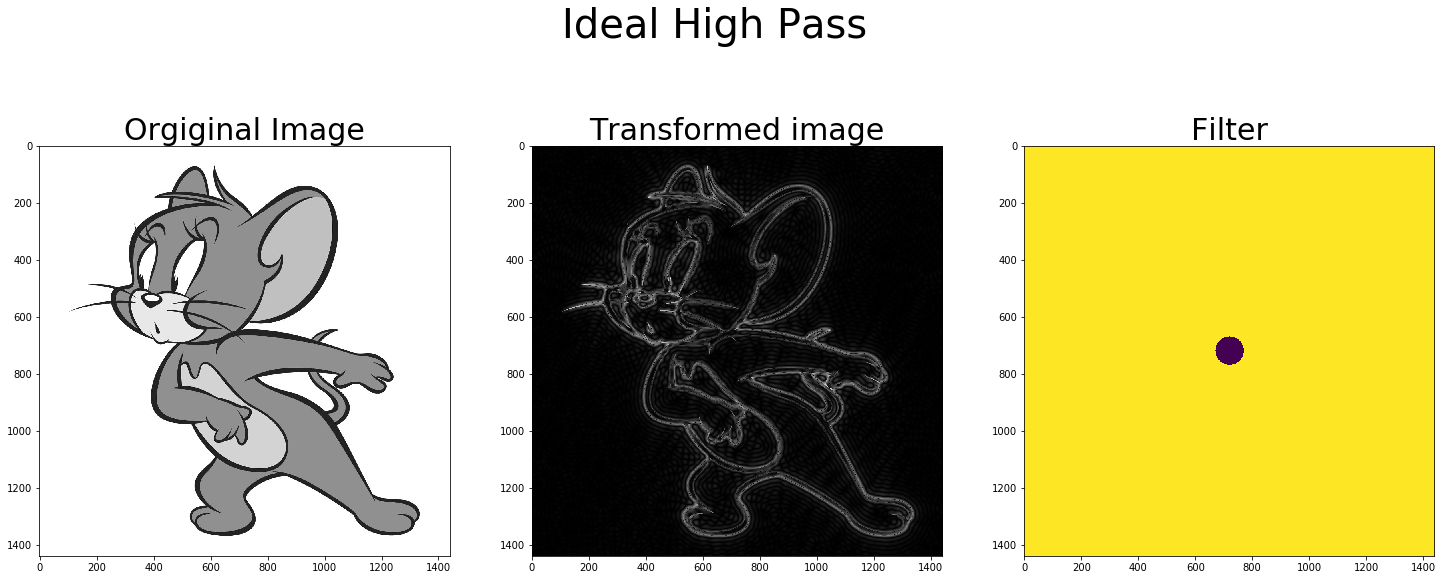

In [12]:
img = cv2.imread('5.jpg',0).astype('float64')
blur, circle = ideal_high(img,50)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.suptitle('Ideal High Pass', fontsize=40)
ax1.set_title('Orgiginal Image', fontsize=30)
im1 = ax1.imshow(img, cmap='gray')
ax2.set_title('Transformed image', fontsize=30)
im2 = ax2.imshow(blur, cmap='gray')
ax3.set_title('Filter', fontsize=30)
im3 = ax3.imshow(circle)
plt.show()

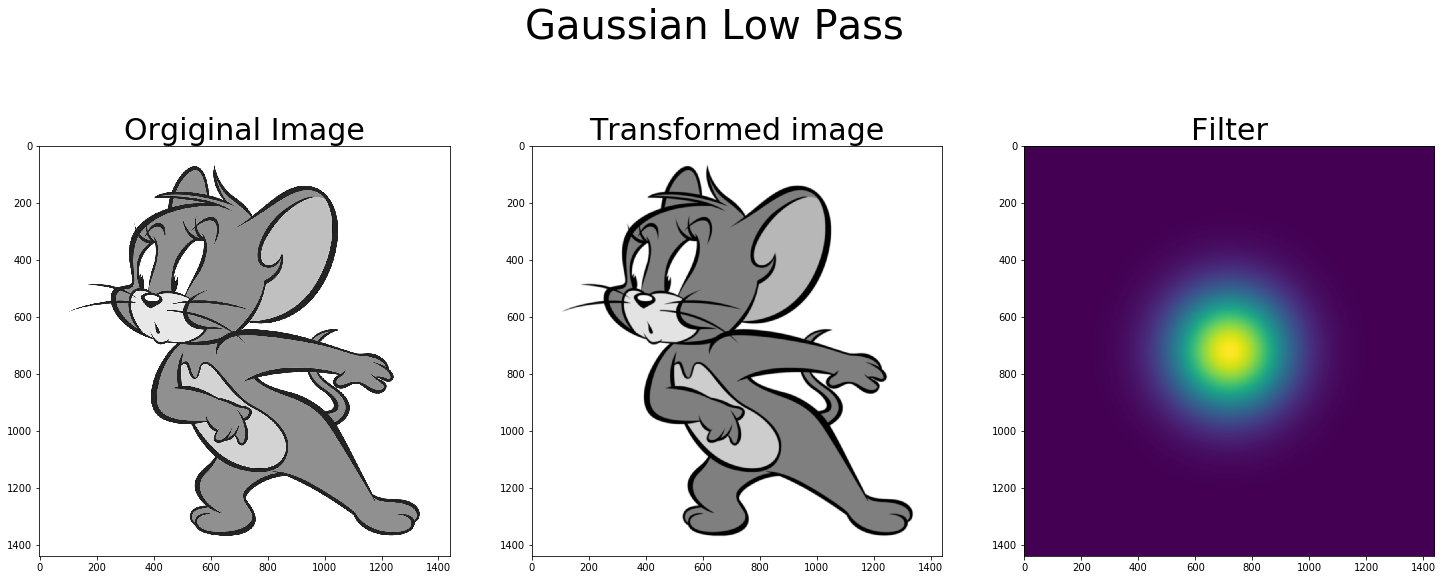

In [14]:
img = cv2.imread('5.jpg',0).astype('float64')
blur, circle = gaussian_low(img,0.5)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.suptitle('Gaussian Low Pass', fontsize=40)
ax1.set_title('Orgiginal Image', fontsize=30)
im1 = ax1.imshow(img, cmap='gray')
ax2.set_title('Transformed image', fontsize=30)
im2 = ax2.imshow(blur, cmap='gray')
ax3.set_title('Filter', fontsize=30)
im3 = ax3.imshow(circle)
plt.show()

(1440, 1440)


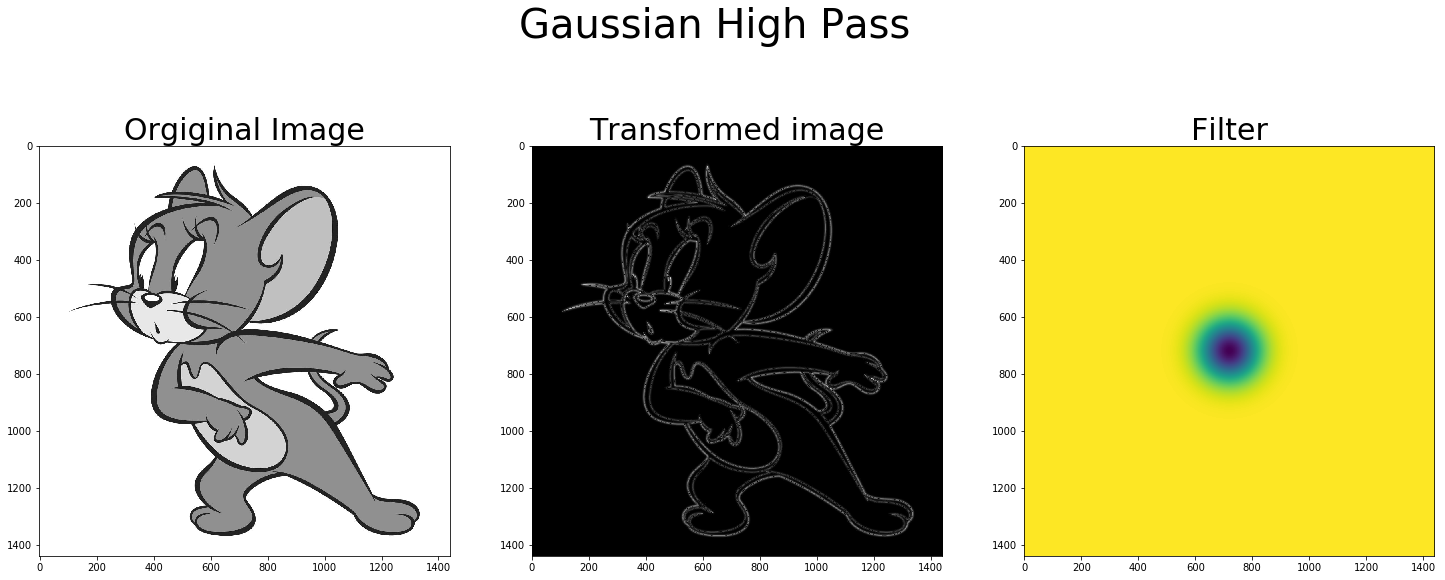

In [40]:
img = cv2.imread('5.jpg',0).astype('float64')
blur, circle = gaussian_high(img,0.5)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.suptitle('Gaussian High Pass', fontsize=40)
ax1.set_title('Orgiginal Image', fontsize=30)
im1 = ax1.imshow(img, cmap='gray')
ax2.set_title('Transformed image', fontsize=30)
im2 = ax2.imshow(blur, cmap='gray')
ax3.set_title('Filter', fontsize=30)
im3 = ax3.imshow(circle)
plt.show()

In [41]:
# def gaus2d(x=0, y=0, mx=0, my=0, sx=1, sy=1):
#     return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))

# x = np.linspace(-5, 5, num=50)
# y = np.linspace(-5, 5, num=50)
# x, y = np.meshgrid(x, y) # get 2D variables instead of 1D
# z = normalize(gaus2d(x, y))
# plt.imshow(z)
